<a href="https://colab.research.google.com/github/mallibus/TF2---colab/blob/master/Colab_3_Building_an_Artificial_Neural_Network_in_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>

In [4]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 80kB/s 
     |████████████████████████████████| 419kB 36.6MB/s 
     |████████████████████████████████| 3.0MB 40.1MB/s 


## Step 1: Installing dependencies and setting up a GPU environment

## Step 2: Importing the libraries and the dataset

In [0]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
tf.__version__

'2.0.0-alpha0'

## Step 3: Data Preprocessing



### Loading the dataset

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# I want to visualize and interpret the dataset
labels=['T-shirt/top',
        'Trouser',
        'Pullover',
        'Dress',
        'Coat',
        'Sandal',
        'Shirt',
        'Sneaker',
        'Bag',
        'Ankle boot'] 

### Normalizing the images

We divide each pixel of the image in the training and test sets by the maximum number of pixels (255).

In this way each pixel will be in the range [0, 1]. By normalizing images we make sure that our model (ANN) trains faster.

In [0]:
X_train = X_train / 255.0

In [0]:
X_test = X_test / 255.0

Visualize a random batch of the training set, with prediction and actual values

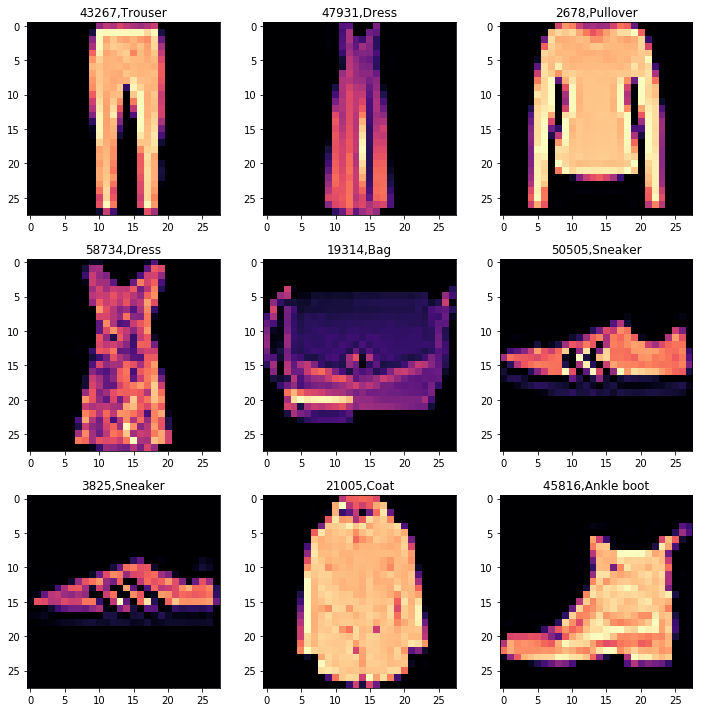

In [8]:
size = 3
sample = np.random.choice(range(len(X_train)),size*size)
plt.figure(figsize=(10,10))
for i in range(size):
  for j in range(size):
#    print(i,j,i*size+(j+1))
    idx = i*size+j
    plt.subplot(size,size,idx+1)
    plt.title(f'{sample[idx]},{labels[y_train[sample[idx]]]}')
    plt.imshow(X_train[sample[idx]],cmap='magma')

plt.tight_layout()
plt.show()

### Reshaping the dataset

Since we are building a fully connected network, we reshape the training set and the test set to be into the vector format.

In [0]:
# Since each image's dimension is 28x28, we reshape the full dataset to [-1 (all elements), height * width]
# I am defining a new variable for the reshaped dataset, because I want to keep the ability to visualize the pictures
X_train_n = X_train.reshape(-1, 28*28)

In [10]:
X_train.shape,X_train_n.shape

((60000, 28, 28), (60000, 784))

In [0]:
# We reshape the test set the same way
# I am defining a new variable for the reshaped dataset, because I want to keep the ability to visualize the pictures
X_test_n = X_test.reshape(-1, 28*28)

In [12]:
X_test.shape,X_test_n.shape

((10000, 28, 28), (10000, 784))

## Step 4: Building an Artificial Neural Network

### Defining the model

Simply define an object of the Sequential model.

In [0]:
model = tf.keras.models.Sequential()

### Adding a first fully-connected hidden layer

Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )

In [0]:


model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))



### Adding a second layer with Dropout

Dropout is a Regularization technique where we randomly set neurons in a layer to zero. That way while training those neurons won't be updated. Because some percentage of neurons won't be updated the whole training process is long and we have less chance for overfitting.

In [0]:

model.add(tf.keras.layers.Dropout(0.2))


### Adding the output layer

- units: number of classes (10 in the Fashion MNIST dataset)
- activation: softmax

In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### Compiling the model

- Optimizer: Adam
- Loss: Sparse softmax (categorical) crossentropy 

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [98]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_38 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [99]:
model.fit(X_train_n, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.5280 - sparse_categorical_accuracy: 0.8137
Epoch 2/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4002 - sparse_categorical_accuracy: 0.8540
Epoch 3/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3679 - sparse_categorical_accuracy: 0.8662
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3444 - sparse_categorical_accuracy: 0.8735
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3302 - sparse_categorical_accuracy: 0.8783


### Model evaluation and prediction

In [100]:
test_loss, test_accuracy = model.evaluate(X_test_n, y_test)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3585 - sparse_categorical_accuracy: 0.8728


In [101]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8727999925613403


# HOMEWORK SOLUTION

I was planning to implement a grid search, so I prepared the function below to test various options in terms of number of levels, neurons per level and dropout for each level.
Then while testing the function I found a combination which is reaching the goal of .88 accuracy on the test set:

1st  layer 500 neurons, + 0.2 dropout

2nd layer 128 neurons + 0.2 dropout

3rd layer 128 neurons + 0.2 dropout

16 epochs

optimizer adam, lr default



In [88]:
def model_test(levels=[500,128,128],dropout=[0.2,0.2,0.2],epochs=16):
  model = tf.keras.models.Sequential()
  
  for i,(l,d) in enumerate(zip(levels,dropout)):
    if i==0:
      print(f'first layer:{l} neurons dropout{d}')
      model.add(tf.keras.layers.Dense(units=l, activation='relu', input_shape=(784, )))
      if d>0:
        model.add(tf.keras.layers.Dropout(d))
    else:
      print(f'layer {i}:{l} neurons dropout{d}')
      model.add(tf.keras.layers.Dense(units=l, activation='relu'))
      if d>0:
        model.add(tf.keras.layers.Dropout(d))
        
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

  model.fit(X_train_n, y_train, epochs=epochs)
  
  test_loss, test_accuracy = model.evaluate(X_test_n, y_test)
  print("Test accuracy: {}".format(test_accuracy))

  return model,test_accuracy
    
  
model,test_accuracy =  model_test()


first layer:500 neurons dropout0.2
layer 1:128 neurons dropout0.2
layer 2:128 neurons dropout0.2
Epoch 1/16
60000/60000 [==============================] - 7s 122us/sample - loss: 0.5655 - sparse_categorical_accuracy: 0.7960
Epoch 2/16
60000/60000 [==============================] - 7s 119us/sample - loss: 0.4178 - sparse_categorical_accuracy: 0.8486
Epoch 3/16
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3830 - sparse_categorical_accuracy: 0.8628
Epoch 4/16
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3606 - sparse_categorical_accuracy: 0.8696
Epoch 5/16
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3472 - sparse_categorical_accuracy: 0.8749
Epoch 6/16
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3341 - sparse_categorical_accuracy: 0.8791
Epoch 7/16
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3211 - sparse_categorical_accuracy: 0.8828
Epoch 8/16
600

In [89]:
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_35 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               64128     
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)              

Visualize a random batch of the test set, with prediction and actual values

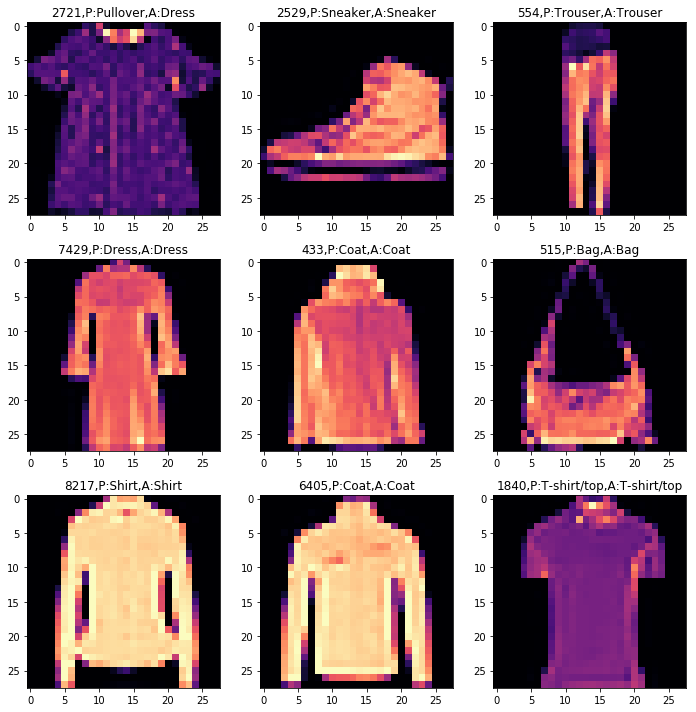

In [90]:
size = 3
sample = np.random.choice(range(len(X_test)),size*size)
predictions = model.predict_classes(X_test_n[sample])
plt.figure(figsize=(10,10))
for i in range(size):
  for j in range(size):
#    print(i,j,i*size+(j+1))
    idx = i*size+j
    plt.subplot(size,size,idx+1)
    plt.title(f'{sample[idx]},P:{labels[predictions[idx]]},A:{labels[y_test[sample[idx]]]}')
    plt.imshow(X_test[sample[idx]],cmap='magma')

plt.tight_layout()
plt.show()